# A physics based reduced order model for burn-up analysis  

## Materials and methods 

We can define the nuclide field as $n$ relevant to I isotopes with densities $n_0, n_1, \cdots, n_I$. It is then governed by the following equation: 

$$
 \frac{\partial n }{\partial t } = M n(t),
$$ (n_equation)

with $M$ the burn-up and decay matrix: 

$$
 M = \begin{pmatrix}
				m_{00} & \ldots & m_{0I} \\
				\vdots & \ddots & \vdots \\ 
				m_{I0} & \ldots & m_{II} \\
			\end{pmatrix}.
$$

The $m_{ij}$ coefficients often have the following terms: 

- $\lambda_i$ the decay constant of isotope i;
- $\phi \sigma_{a,i}$ the absorption reaction rate of isotope i;
- $\phi \sigma_{f,i}$ the fission reaction rate of isotope i;
- $K_{ij} \phi \sigma_{f,i}$ the fraction of fission product j by the fissions of i. 

Using the fact that the initial density is $n(t_0)$ and A is time independent, we have: 

$$
 n(t) = n(t_0) e^{A(t-t_0)}.
$$ (n_solution)

We can also defined a perturbed configuration: 

$$ \frac{\partial n' }{\partial t } = M' n'(t),$$

with $n' = n + \delta n$ and $M' = M + \delta M$.

In this paper, we developed a reduce order model of the nuclide field at the final time $t_f$:

$$ 
\delta n(t_f) = \sum_{j=0}^R a_j q_j.
$$

## Theory

The reduced basis $Q = (q_0, q_1, \ldots, q_R)$, with $R$ the size if the basis, is obtained with a range finding algorithm. It is the offline step. Then, one has to calculated the corresponding $a_j$ coefficients in the online step. 

### The offline step 

The basis $Q$ is created during the offline step by using a range finding algorithm. This algorithm constructs an active subpaces of the nuclide field depletion problem. The subspaced is created with a singular value decomposition of a list of snapshots. The snapshots are perturbeb results of the nuclide depletion equation:

$$ \delta n_k(tf) = n_k(\alpha_k, tf) - n(\alpha, tf). $$

Hence, after the calculation of $R$ snapshots $\delta N = (\delta n_0(tf), \ldots, \delta n_R(tf))^T$, we can factorize it usign a compact singular value decompositon as :

$$\delta N = U \Sigma Q.$$

Since $R < I$,  U is a $R \times R$ semi-unitary matrix, $\Sigma$ a $r \times r$ suqare diagonal matrix and Q a $R \times I $ semi-unitary matrix. Q is then the reduced basis for our reduced order model. 



### The online step

#### The first order formulation

Once the basis $Q$ is created, the $a_j$ have to be calculated. If the nuclide field is known at $t_f$, we have: 

$$ a_j = q_j \delta n(t_f).$$

Hence, $a_j$ can be calculated with the depletion perturbation theory. 

Considering $R_i = q_j n(tf)$, if we want to calculate $ \delta R_i = q_j \delta n(t_f)$, we can use the method of Lagrange multipliers:

$$
    K_i(\alpha) = R_i(n) - \int_{t_0}^{t_f} n_i^\dagger \left( M(\alpha) n(t) - \frac{\partial n(t) }{\partial t } \right) dt,
$$

with: 

- $\alpha$ the input parameters defining the $M$,
- $n_i$ the Lagrange multiplier associated with the nuclide depletion equation, also called the adjoint nuclide densities. 

We have for every $i$, $K_i(\alpha) = R_i(\alpha)$ and $K'_i(\alpha') = R'_i(\alpha')$, hence:

$$
    \delta K_i = \delta R_i.
$$

By expanding $K'_i(\alpha')$ at first order, we have:

$$
K'_i \approx K_i + \frac{\partial K_i}{\partial \alpha} \delta \alpha + \frac{\partial K_i}{\partial n} \delta n + \frac{\partial K_i}{\partial n_i^\dagger} \delta n_i^\dagger.
$$

If we make $K'_i(\alpha')$ stationary to all the variables except $\alpha$, we can derive the following equations: 

- 
$$ \frac{\partial K_i}{\partial n_i^\dagger} \delta n_i^\dagger = 0 $$ 
$$ \Leftrightarrow \frac{\partial }{\partial n_i^\dagger} \int_{t_0}^{t_f} n_i^\dagger \left( M(\alpha) n(t) - \frac{\partial n(t) }{\partial t } \right)dt \delta n_i^\dagger = 0 $$ 
$$ \Leftrightarrow \left( M(\alpha) n(t) - \frac{\partial n(t) }{\partial t } \right) = 0 $$

This is the nuclide field depletion equation. 

- 
$$ \frac{\partial K_i}{\partial n} \delta n = 0 $$ 
$$ \Leftrightarrow \frac{\partial R_i}{\partial n} \delta n +  \frac{\partial }{\partial n} \int_{t_0}^{t_f} n_i^\dagger  \left( M(\alpha) n(t) - \frac{\partial n(t) }{\partial t } \right)dt \delta n = 0 $$ 
$$ \Leftrightarrow q_i \delta n + \frac{\partial }{\partial n} \int_{t_0}^{t_f} \left( n_i^\dagger M(\alpha) n(t) - n_i^\dagger \frac{\partial n(t) }{\partial t } \right)dt \delta n = 0 $$ 
$$ \Leftrightarrow q_i \delta n + \frac{\partial }{\partial n} \left( \int_{t_0}^{t_f}n M^T(\alpha) n_i^\dagger(t) dt  - n_i^\dagger(t_f) n(t_f) + n_i^\dagger(t_0) n(t_0) + \int_{t_0}^{t_f} n \frac{\partial n_i^\dagger(t) }{\partial t }dt \right) \delta n = 0 $$ 
$$ \Leftrightarrow q_i \delta n +  \left( \int_{t_0}^{t_f} M^T(\alpha) n_i^\dagger(t) dt  - n_i^\dagger(t_f) \delta n(t_f) + n_i^\dagger(t_0) \delta n(t_0) + \int_{t_0}^{t_f} \frac{\partial n_i^\dagger(t) }{\partial t }dt \right) \delta n = 0 $$ 

By setting $n_i^\dagger(t_f) = q_i$, we have:


$$ \Leftrightarrow   \int_{t_0}^{t_f} \left( M^T(\alpha) n_i^\dagger(t) + \frac{\partial n_i^\dagger(t) }{\partial t } \right)dt  \delta n + n_i^\dagger(t_0) \delta n(t_0) = 0. $$ 

If we respect the following equation, so called adjoint nuclide field depletion equation. :
$$  M^T(\alpha) n_i^\dagger(t) + \frac{\partial n_i^\dagger(t) }{\partial t } = 0, $$ 

$ n_i^\dagger(t_0) \delta n(t_0)$ is the only term remaining. 

Thus, we have:

$$ \delta K_i = \frac{\partial K_i}{\partial \alpha} \delta \alpha + n_i^\dagger(t_0) \delta n(t_0)$$
$$ \delta K_i = \int_{t_0}^{t_f} n_i^\dagger(t) \delta M n(t) dt  + n_i^\dagger(t_0) \delta n(t_0)$$
$$ a_i = \delta K_i = \int_{t_0}^{t_f} n_i^\dagger(t) \delta M   n(t) dt + n_i^\dagger(t_0) \delta n(t_0)$$

As stated in [Williams]: 

$$n(t)n^\dagger(t) = constant = q_i^T n(t_f) = n(0)n^\dagger(0)$$

#### The exact formulation 

Like in the first order formulation, we use the following derivation of $K_i$:

$$
K_i = R_i + \int_{t_0}^{t_f}n_i^\dagger M(\alpha) n(t) dt  - n_i^\dagger(t_f) n(t_f) + n_i^\dagger(t_0) n(t_0) + \int_{t_0}^{t_f} n \frac{\partial n_i^\dagger(t) }{\partial t }dt . 
$$

Hence, 

$$\delta K_i = \delta R_i + \int_{t_0}^{t_f} n_i^\dagger \left( \delta M(\alpha) n(t) + M(\alpha) \delta n(t) + \delta M(\alpha) \delta n(t) \right)
- n_i^\dagger(t_f) \delta n(t_f) + n_i^\dagger(t_0) \delta n(t_0) + \int_{t_0}^{t_f} \delta n \frac{\partial n_i^\dagger(t) }{\partial t }dt
$$

Knowing that $\delta n(t_0) = 0$ and by setting $n_i^\dagger(t_f) = q_i$ and removing the adjoint nuclide filed equation, we have:

$$ \delta K_i = \int_{t_0}^{t_f} \left( n_i^\dagger(t) \delta M n(t) + n_i^\dagger(t) \delta M \delta n(t) \right) dt $$
$$ a_i = a_{i,l} + a_{i,nl}  $$

If we work on the vectors: 

$$ A  = A_l + A_{nl}, $$ 

with:

$$A_{nl} = \begin{pmatrix}
				a_{0,nl} & \ldots & a_{R,nl} 
			\end{pmatrix},$$ 

$$A_{nl} = \begin{pmatrix}
				\int_{t_0}^{t_f} n_0^\dagger(t) \delta M \delta n(t) dt & \ldots & \int_{t_0}^{t_f} n_R^\dagger(t) \delta M \delta n(t) dt
			\end{pmatrix},$$ 
$$A_{nl} = \begin{pmatrix}
				\int_{t_0}^{t_f} n_0^\dagger(t) \delta M \sum_{j=0}^R a_j q_j dt & \ldots & \int_{t_0}^{t_f} n_R^\dagger(t) \delta M \sum_{j=0}^R a_j q_j dt
			\end{pmatrix},$$ 

dernière equation fausse, comment calculer $\delta n(t)$ sachant que $n(t)$ dépend des conditions final ?  

peut être avec un changement de variable ? 

todo: comment faire pour pouvoir faire des pas de temps non uniforme? 

## An analytical example 

As in the reference [Gandini], let us consider the two equation system:

$$
\begin{split}
	&  \frac{dn_0}{dt} = m_{00} n_0,\\
	&  \frac{dn_1}{dt} = m_{10} n_0 + m_{11}n_1,\\
\end{split}
$$

with initial conditions $n_{0,t_0}$ and $n_{1,t_0}$ at $t=0$. The solutions are (with $m_{00} \ne m_{11}$):

$$
\begin{split}
	&  n_0(t) = n_{0,t_0} e^{m_{00}(t-t_0)},\\
	&  n_1(t) = \frac{m_{10} n_{0,t_0}}{m_{00}-m_{11}} e^{m_{00}(t-t_0)} + \left( n_{1,t_0} - \frac{m_{10} n_{0,t_0}}{m_{00}-m_{11}} \right) e^{m_{11}(t-t_0)}. \\
\end{split}
$$

The adjoint nuclide equations are: 

$$
\begin{split}
	&  -\frac{dn^\dagger_0}{dt} = m_{00} n^\dagger_0 + m_{10}n^\dagger_1,\\
	&  -\frac{dn^\dagger_1}{dt} = m_{11} n^\dagger_1. \\
\end{split}
$$

The solutions are (with $m_{00} \ne m_{11}$):

$$
\begin{split}
	&  n^\dagger_0(t) = -\frac{m_{10} n^\dagger_{1,t_f}}{m_{00}-m_{11}} e^{-m_{11}(t-t_1)} + \left( n^\dagger_{0,t_f} + \frac{m_{10} n^\dagger_{1,t_f}}{m_{00}-m_{11}} \right) e^{-m_{00}(t-t_f)},\\
	&  n^\dagger_1(t) = n^\dagger_{1,t_f} e^{-m_{11}(t-t_f)}, \\
\end{split}
$$

with $n_{0,t_f}$ and $n_{1,t_f}$ the final conditions at $t_f$.

For the data, we use [Williams1979, p120]:

| Parameter | Value | Definiton | 
|---|---| --- |
| $n_{0, t_0}$ (at/cm3)| $1 \times 10^{24}$ | |
| $n_{1, t_0}$ (at/cm3)| $0$ | |
| $\sigma_{a0}^0$ (barns)| 9 | |
| $\sigma_{a1}^0$ (barns)| 2 | |
| $\sigma_{f1}^0$ (barns)| 1 | |
| $\sigma_{a1}^1$ (barns)| 10 | |
| $\gamma$ | 0.5 | |
| $\lambda_1$ (s-1) |$4.0 \times 10^{-9}$ | |
| $\phi_0$ (n/cm2s)| $0.6667 \times 10^{14}$ | |
| $\phi_1$ (n/cm2s)| $0.2000 \times 10^{15}$ | |
|  $m_{00} = -\sigma_{a0}^0 \phi_0 - \sigma_{a1}^0 \phi_1$ (s-1) | $-6.0000\times 10^{-10}$  | |
|  $m_{01} = \gamma \sigma_{f1}^0 \phi_1 $ (s-1) | $9.9999 \times 10^{-11}$|
|  $m_{11} = - \sigma_{a1}^1 \phi_1 - \lambda_1$ (s-1) | $-6.0000 \times 10^{-9}$|

In [189]:
#import
import matplotlib.pyplot as plt
import numpy as np
import copy
import scipy.linalg 

In [190]:
# entry parameters 

n0_0 = 1e24
n1_0 = 0

sigma_a0_0 = 3
sigma_a1_0 = 2
sigma_f1_0 = 1

sigma_a1_1 = 10
gamma = 0.5

lambda_1 = 4e-9

phi_0 = 0.6667 *1e14
phi_1 = 0.2 *1e15

m00 = -sigma_a0_0 *1e-24 * phi_0 - sigma_a1_0 *1e-24 * phi_1
m10 = gamma * sigma_f1_0 * 1e-24 * phi_1
m11 = - sigma_a1_1 *1e-24 * phi_1 - lambda_1

print("m00 = ", m00)
print("m10 = ", m10)
print("m11 = ", m11)

def get_n(t, t0, n0_0, n1_0, m00, m10, m11):
    n0 = n0_0 * np.exp(m00*(t-t0))
    n1 = (m10*n0_0)/(m00-m11) * np.exp(m00*(t-t0)) + (n1_0-(m10*n0_0)/(m00-m11))*np.exp(m11*(t-t0))
    return n0, n1

def get_nt(t, tf, n0t_f, n1t_f, m00, m10, m11):
    n0t = -(m10*n1t_f)/(m00-m11) * np.exp(-m11*(t-tf)) + (n0t_f+(m10*n1t_f)/(m00-m11))*np.exp(-m00*(t-tf))
    n1t = n1t_f * np.exp(-m11*(t-tf)) 
    return n0t, n1t

m00 =  -6.000099999999999e-10
m10 =  9.999999999999999e-11
m11 =  -6.000000000000001e-09


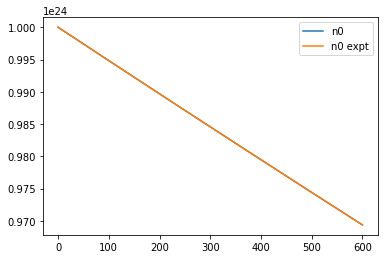

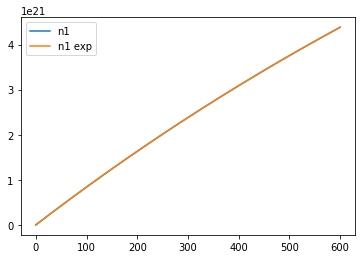

In [191]:
# exact results for the nuclide fields 
t0 = 0.
tf = 600*24*60*60
dt = 60*24
t = np.arange(t0, tf, dt)

n0, n1 = get_n(t, t0, n0_0, n1_0, m00, m10, m11)

#with matrix exp (for test)
n_exp = np.zeros((2, len(t)))
n_exp_0 = np.array([n0_0, n1_0])
M = np.array([[m00, 0],
              [m10, m11]])

for i, t_i in enumerate(t):
    n_exp[:, i] = scipy.linalg.expm(M*(t_i-t0)).dot(n_exp_0)

fig, ax = plt.subplots()
ax.plot(t/(24*60*60), n0, label="n0")
ax.plot(t/(24*60*60), n_exp[0], label="n0 expt")
ax.legend()
plt.show()
fig, ax = plt.subplots()
ax.plot(t/(24*60*60), n1, label="n1")
ax.plot(t/(24*60*60), n_exp[1], label="n1 exp")
ax.legend()
plt.show()

[0 1]
[0 1]
[[-0.03110452  0.005184  ]
 [ 0.         -0.31104   ]]
[[0.96937425 0.        ]
 [0.00438315 0.73268457]]
[[0.96937425 0.00438315]
 [0.         0.73268457]]
[[ 1.03159332 -0.00617132]
 [ 0.          1.36484381]]
[[ 1.03159332  0.        ]
 [-0.00617132  1.36484381]]


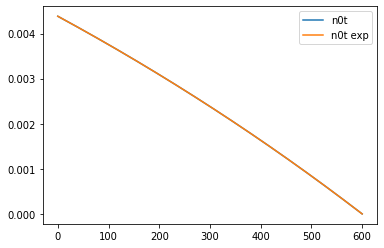

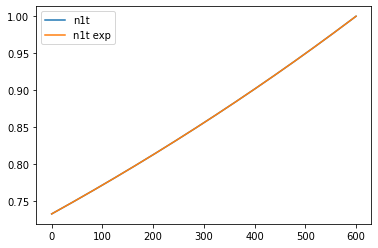

In [200]:
# exact results for the adjointe nuclide fields 

n0t_f = 1
n1t_f = 0

n0t_f = 0
n1t_f = 1


n0t, n1t = get_nt(t, tf, n0t_f, n1t_f, m00, m10, m11)

nt_exp = np.zeros((2, len(t)))
nt_exp_0 = np.array([n0t_f, n1t_f])
print(nt_exp_0)
M_t = M.transpose()
# M_t[0, 1] *= 100

def my_expm(A):
    m,n = np.shape(A)
    norm = np.sqrt(np.trace(A@A.T))
    k = 0
    fact = 1
    matpow = np.eye(n)
    expmat = np.matrix(np.zeros([n,n]))
    lastnorm = 1
    while lastnorm > 1e-8:
        expmat += matpow/fact
        lastnorm = np.max(abs(matpow/fact))
        k += 1
        fact *= k
        matpow = A@matpow
    return expmat

for i, t_i in enumerate(t):
    nt_exp[:, i] = scipy.linalg.expm(-M_t*(t_i-tf))@nt_exp_0
    # nt_exp[:, i] = nt_exp_0.dot(my_expm(-M_t*(t_i-tf)))

# print(nt_exp_0)
# print(-M_t*(t0-tf))
# print(scipy.linalg.expm(-M*(t0-tf)))
# print(my_expm(-M_t*(t0-tf)))

# print(scipy.linalg.expm(M_t*(t0-tf)))
# print(scipy.linalg.expm(M*(t0-tf)))

# nf_i =  scipy.linalg.expm(M_i*(tf-t0)).dot(n0_i)
fig, ax = plt.subplots()
ax.plot(t/(24*60*60), n0t, label="n0t")
ax.plot(t/(24*60*60), nt_exp[0], label="n0t exp")

ax.legend()
plt.show()
fig, ax = plt.subplots()
ax.plot(t/(24*60*60), n1t, label="n1t")
ax.plot(t/(24*60*60), nt_exp[1], label="n1t exp")

ax.legend()
plt.show()

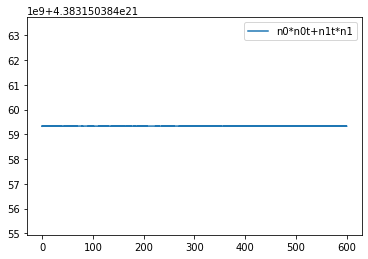

In [170]:
# product of adjoint and direct field

fig, ax = plt.subplots()
ax.plot(t/(24*60*60), n0t*n0 + n1t*n1, label="n0*n0t+n1t*n1")
ax.legend()
plt.show()

### Perturbation test 

We perturb the initial condition then the depletion matrix terms. 

### Initial concentrations perturbation

In [171]:
n = np.vstack((n0, n1)).T

M = np.array([[m00, 0],
              [m10, m11]])


n0_0 = 1e24
n1_0_p = 0

dM = np.array([[m00*0.01, 0],
              [0, 0]])

dN0 = np.array([0, 0])

n0_p, n1_p = get_n(t, t0, n0_0, n1_0_p, m00*1.01, m10, m11)

n0t_f = 0
n1t_f = 1
n0t, n1t = get_nt(t, tf, n0t_f, n1t_f, m00, m10, m11)
nt = np.vstack((n0t, n1t)).T

ntdMn = np.zeros(nt.shape[0])

for i in range(len(ntdMn)):
    ntdMn[i] = nt[i].dot(dM.dot(n[i]))

int_ntdMn = np.trapz(ntdMn, t)

dn1_tf = int_ntdMn + nt[0].dot(dN0)
print("dn1_tf exact = ", n1_p[-1]-n1[-1])
print("dn1_tf pert = ", dn1_tf)
print("delta dn1_tf (%) = ", 100*(dn1_tf-(n1_p[-1]-n1[-1]))/(n1_p[-1]-n1[-1]))

dn1_tf exact =  -7.1332889427234e+17
dn1_tf pert =  -7.134417993479894e+17
delta dn1_tf (%) =  0.01582791284020275


In [172]:
n = np.vstack((n0, n1)).T

M = np.array([[m00, 0],
              [m10, m11]])


n0_0 = 1e24
n1_0_p = 0

dM = np.array([[m00*0.01, 0],
              [0, 0]])

dN0 = np.array([0, 0])

n0_p, n1_p = get_n(t, t0, n0_0, n1_0_p, m00*1.01, m10, m11)

n0t_f = 1
n1t_f = 0
n0t, n1t = get_nt(t, tf, n0t_f, n1t_f, m00, m10, m11)
nt = np.vstack((n0t, n1t)).T

ntdMn = np.zeros(nt.shape[0])

for i in range(len(ntdMn)):
    ntdMn[i] = nt[i].dot(dM.dot(n[i]))

int_ntdMn = np.trapz(ntdMn, t)

dn0_tf = int_ntdMn + nt[0].dot(dN0)
print("dn0_tf exact = ", n0_p[-1]-n0[-1])
print("dn0_tf pert = ", dn0_tf)
print("delta dn0_tf (%) = ", 100*(dn0_tf-(n0_p[-1]-n0[-1]))/(n0_p[-1]-n0[-1]))

dn0_tf exact =  -3.0146419141662e+20
dn0_tf pert =  -3.015108165273319e+20
delta dn0_tf (%) =  0.015466218555764018


In [173]:
n0_0 = 1e24
n1_0_p = 0.1*1e24

dM = np.array([[0, 0],
               [0, 0]])

dN0 = np.array([0, +n1_0_p])

n0_p, n1_p = get_n(t, t0, n0_0, n1_0_p, m00, m10, m11)

n0t_f = 0
n1t_f = 1
n0t, n1t = get_nt(t, tf, n0t_f, n1t_f, m00, m10, m11)
nt = np.vstack((n0t, n1t)).T

ntdMn = np.zeros(nt.shape[0])

for i in range(len(ntdMn)):
    ntdMn[i] = nt[i].dot(dM.dot(n[i]))

int_ntdMn = np.trapz(ntdMn, t)

dn1_tf = int_ntdMn + nt[0].dot(dN0)
print("dn1_tf exact = ", n1_p[-1]-n1[-1])
print("dn1_tf pert = ", dn1_tf)
print("delta dn1_tf (%) = ", 100*(dn1_tf-(n1_p[-1]-n1[-1]))/(n1_p[-1]-n1[-1]))

dn1_tf exact =  7.326908983224751e+22
dn1_tf pert =  7.326845679004611e+22
delta dn1_tf (%) =  -0.0008639962675298613


### ROM perturbations

The range finding algorithm gives the following basis:

$$
Q = \begin{pmatrix}
		0 & 1  \\
		1 & 0  \\ 
	\end{pmatrix}
$$


It works with the same examples than before ! 

## A simple case with u5 chain, xe chain and sm chain

The data used are : 

| Isotope      | Nuclear data      | Group 0                      | Group 1                 | 
|---           |---                | ---                          | ---                     |
| $^{235}U$    |  $\sigma_{a}$     |   1.8                        |  100.0                  |
| $^{235}U$    |  $\sigma_{f}$     |   1.5                        |  55.0                   |
| $^{235}U$    |  $n_0$            |  $3.5 \times 10^{23}$        |    /                    |
| $^{238}U$    |  $\sigma_{a}$     |   0.35                       |    2.0                  |
| $^{238}U$    |  $n_0$            |  $96.5 \times 10^{23}$       |    /                    |
| $^{239}U$    |  $\lambda$        |  $7.25 \times 10^{-4}$       |    /                    |
| $^{239}U$    |  $n_0$            |  0                           |    /                    |
| $^{239}Np$   |  $\lambda$        |  $5.03 \times 10^{-6}$       |    /                    |
| $^{239}Np$   |  $n_0$            |  0                           |    /                    |
| $^{239}Pu$   | $\sigma_{a}$      |  2.0                         |    190.0                |
| $^{239}Pu$   | $\sigma_{f}$      |  1.8                         |   120.0                 |
| $^{239}Pu$   |  $n_0$            |  0                           |    /                    |
| $^{240}Pu$   | $\sigma_{a}$      |  0.2                         |    110.0                |
| $^{240}Pu$   |  $n_0$            |  0                           |    /                    |
| $^{241}Pu$   | $\sigma_{a}$      |  2.5                         |    180.0                |
| $^{241}Pu$   | $\sigma_{f}$      |  0.5                         |   140.0                 |
| $^{241}Pu$   |  $\lambda$        |  $2.11 \times 10^{-9}$       |    /                    |
| $^{241}Pu$   |  $n_0$            |  0                           |    /                    |
| $^{242}Pu$   | $\sigma_{a}$      |  0.7                         |    70.0                 |
| $^{242}Pu$   |  $n_0$            |  0                           |    /                    |
| $^{135}I$    |  $\lambda$        |  $4.25 \times 10^{-5}$       |    /                    |
| $^{135}I$    |  $\gamma$         |  0.064                       |    /                    |
| $^{135}I$    |  $n_0$            |  0                           |    /                    |
| $^{135}Xe$   | $\sigma_{a}$      |  0.0                         |   $2.0 \times 10^{5}$   |
| $^{135}Xe$   |  $\lambda$        |  $3.03 \times 10^{-5}$       |    /                    |
| $^{135}Xe$   |  $n_0$            |  0                           |    /                    |
| $^{149}Nd$   |  $\lambda$        |  $1.61 \times 10^{-4}$       |    /                    |
| $^{149}Nd$   |  $\gamma$         |  0.0109                      |    /                    |
| $^{149}Nd$   |  $n_0$            |  0                           |    /                    |
| $^{149}Pm$   |  $\lambda$        |  $5.24 \times 10^{-6}$       |    /                    |
| $^{149}Pm$   |  $n_0$            |  0                           |    /                    |
| $^{149}Sm$   | $\sigma_{a}$      |  0.0                         |   $1.0 \times 10^{3}$   |
| $^{149}Sm$   |  $n_0$            |  0                           |    /                    |

$\sigma_{c} = \sigma_{a} - \sigma_{f} $

todo: add gamma for xe isot

We have the following equation in its matrix form : 

$$


\frac{d}{dt} \begin{pmatrix}
				n_{^{235}U}  \\
				n_{^{238}U}  \\ 
				n_{^{239}U}  \\
				n_{^{239}Np}  \\
				n_{^{239}Pu}  \\
				n_{^{240}Pu}  \\
				n_{^{241}Pu}  \\
				n_{^{242}Pu}  \\
				n_{^{135}I}  \\
				n_{^{135}Xe}  \\
				n_{^{149}Nd}  \\
				n_{^{149}Pm}  \\
				n_{^{149}Sm}  \\
			\end{pmatrix}

			= M

			\begin{pmatrix}
				n_{^{235}U}  \\
				n_{^{238}U}  \\ 
				n_{^{239}U}  \\
				n_{^{239}Np}  \\
				n_{^{239}Pu}  \\
				n_{^{240}Pu}  \\
				n_{^{241}Pu}  \\
				n_{^{242}Pu}  \\
				n_{^{135}I}  \\
				n_{^{135}Xe}  \\
				n_{^{149}Nd}  \\
				n_{^{149}Pm}  \\
				n_{^{149}Sm}  \\
			\end{pmatrix}.
$$

with: 

$$ 

M = \begin{pmatrix}
				- \sigma_{a^{^{235}U}} \phi  & 0                      & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
				0                     & - \sigma_{a^{^{238}U}} \phi & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\ 
				0                     & \sigma_{c^{^{238}U}} \phi & -\lambda_{^{239}U} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
				0                     & 0                                                               &  \lambda_{^{239}U} & -\lambda_{^{239}Np} & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0     \\
				0 & 0 & 0 & \lambda_{^{239}Np} & - \sigma_{a^{^{239}Pu}} \phi & 0& 0& 0& 0& 0& 0& 0& 0 \\
				0 & 0 & 0 & 0 & \sigma_{c^{^{239}Pu}} \phi  & -\sigma_{a^{^{240}Pu}} \phi & 0 & 0 & 0 &0  & 0 & 0 & 0    \\
				0 & 0 & 0 & 0 & 0 &  \sigma_{c^{^{240}Pu}} \phi  & -\sigma_{a^{^{241}Pu}} \phi -\lambda_{^{241}Pu}& 0 & 0 & 0 & 0  & 0  & 0 \\
				0 & 0 & 0 & 0 & 0 & 0 & \sigma_{c^{^{241}Pu}} \phi & -\sigma_{a^{^{242}Pu}} \phi & 0& 0  & 0 & 0  & 0 \\
				\gamma_{^{135}I} \sigma_{f^{^{235}U}} \phi &0  & 0 & 0 & \gamma_{^{135}I} \sigma_{f^{^{239}Pu}} \phi & 0 & \gamma_{^{135}I} \sigma_{f^{^{241}Pu}} \phi & 0 &  - \lambda_{^{135}I}& 0 & 0 & 0 & 0 \\
				0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \lambda_{^{135}I} & - \sigma_{a^{^{135}Xe}} \phi& 0 & 0 & 0  \\
				\gamma_{^{149}Nd} \sigma_{f^{^{235}U}} \phi &0  & 0 & 0 & \gamma_{^{149}Nd} \sigma_{f^{^{239}Pu}} \phi & 0 & \gamma_{^{149}Nd} \sigma_{f^{^{241}Pu}} \phi & 0 &  0 & 0 & - \lambda_{^{149}Nd} & 0 & 0 \\
				0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & \lambda_{^{149}Nd} & -\lambda_{^{149}Pm} & 0  \\
				0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &  0 &0 & 0 & \lambda_{^{149}Pm} & -\sigma_{a^{^{149}Sm}} \phi  \\
			\end{pmatrix}
$$

In [201]:
xs = {}

xs["U235"] = {}
xs["U235"]["siga"] = [1.8, 100.]
xs["U235"]["sigf"] = [1.5, 55.]
xs["U235"]["n0"] = 3.5 * 1e23

xs["U238"] = {}
xs["U238"]["siga"] = [0.35, 2.]
xs["U238"]["n0"] = 96.5 * 1e23

xs["U239"] = {}
xs["U239"]["lambda"] = 7.25 * 1e-4
xs["U239"]["n0"] = 0.

xs["Np239"] = {}
xs["Np239"]["lambda"] = 5.03 * 1e-6
xs["Np239"]["n0"] = 0.

xs["Pu239"] = {}
xs["Pu239"]["siga"] = [2.0, 190.]
xs["Pu239"]["sigf"] = [1.8, 120.]
xs["Pu239"]["n0"] = 0.

xs["Pu240"] = {}
xs["Pu240"]["siga"] = [0.2, 110.]
xs["Pu240"]["n0"] = 0.

xs["Pu241"] = {}
xs["Pu241"]["siga"] = [2.5, 180.]
xs["Pu241"]["sigf"] = [0.5, 140.]
xs["Pu241"]["lambda"] = 2.11 *1e-9
xs["Pu241"]["n0"] = 0.

xs["Pu242"] = {}
xs["Pu242"]["siga"] = [0.7, 70.]
xs["Pu242"]["n0"] = 0.

xs["I135"] = {}
xs["I135"]["gamma"] = 0.064
xs["I135"]["lambda"] = 4.25 *1e-5
xs["I135"]["n0"] = 0.

xs["Xe135"] = {}
xs["Xe135"]["siga"] = [0.0, 2. * 1e5]
xs["Xe135"]["lambda"] = 3.03 *1e-5
xs["Xe135"]["n0"] = 0.

xs["Nd149"] = {}
xs["Nd149"]["gamma"] = 0.0109
xs["Nd149"]["lambda"] = 1.61 *1e-4
xs["Nd149"]["n0"] = 0.

xs["Pm149"] = {}
xs["Pm149"]["lambda"] = 5.24 *1e-6
xs["Pm149"]["n0"] = 0.

xs["Sm149"] = {}
xs["Sm149"]["siga"] = [0.0, 1e-3]
xs["Sm149"]["n0"] = 0.

for isot, xs_i in xs.items():

    if "siga" in xs_i.keys():
        xs[isot]["siga"] =np.array(xs[isot]["siga"])*1e-24

        if "sigf" in xs_i.keys():
            xs[isot]["sigf"] =np.array(xs[isot]["sigf"])*1e-24
            xs[isot]["sigc"] = xs[isot]["siga"] - xs[isot]["sigf"]
        else:
            xs[isot]["sigc"] = xs[isot]["siga"]


t0 = 0.
tf = 5*24*60*60
dt = 60*60/10
# t = np.arange(t0, tf, dt)
t = np.linspace(t0, tf, int(tf/dt))
# print(t)
# print(5*24*60*60)


In [202]:
isot_list = ['U235', 'U238', 'U239', 'Np239', 'Pu239', 'Pu240', 'Pu241', 'Pu242', 'I135', 'Xe135', 'Nd149', 'Pm149', 'Sm149'] #list(xs.keys())
n0 = np.zeros(len(isot_list))
for i, isot in enumerate(isot_list):
    n0[i] = xs[isot]["n0"]

def getM(xs, phi):
    M = np.zeros((len(isot_list), len(isot_list)))
    M[0, 0] = -phi.dot(xs["U235"]["siga"])

    M[1, 1] = -phi.dot(xs["U238"]["siga"])

    M[2, 1] = +phi.dot(xs["U238"]["sigc"])
    M[2, 2] = -xs["U239"]["lambda"]

    M[3, 2] = xs["U239"]["lambda"]
    M[3, 3] = -xs["Np239"]["lambda"]

    M[4, 3] = xs["Np239"]["lambda"]
    M[4, 4] = -phi.dot(xs["Pu239"]["siga"])

    M[5, 4] = phi.dot(xs["Pu239"]["sigc"])
    M[5, 5] = -phi.dot(xs["Pu240"]["siga"])

    M[6, 5] = phi.dot(xs["Pu240"]["sigc"])
    M[6, 6] = -phi.dot(xs["Pu241"]["siga"]) - xs["Pu241"]["lambda"]

    M[7, 6] = phi.dot(xs["Pu241"]["sigc"])
    M[7, 7] = -phi.dot(xs["Pu242"]["siga"])

    M[8, 0] = xs["I135"]["gamma"] * phi.dot(xs["U235"]["sigf"])
    M[8, 4] = xs["I135"]["gamma"] * phi.dot(xs["Pu239"]["sigf"])
    M[8, 6] = xs["I135"]["gamma"] * phi.dot(xs["Pu241"]["sigf"])
    M[8, 8] = -xs["I135"]["lambda"]

    M[9, 8] = xs["I135"]["lambda"] 
    M[9, 9] = -phi.dot(xs["Xe135"]["siga"])

    M[10, 0] = xs["Nd149"]["gamma"] * phi.dot(xs["U235"]["sigf"])
    M[10, 4] = xs["Nd149"]["gamma"] * phi.dot(xs["Pu239"]["sigf"])
    M[10, 6] = xs["Nd149"]["gamma"] * phi.dot(xs["Pu241"]["sigf"])
    M[10, 10] = -xs["Nd149"]["lambda"]

    M[11, 10] = xs["Nd149"]["lambda"]
    M[11, 11] = -xs["Pm149"]["lambda"]

    M[12, 11] = xs["Pm149"]["lambda"]
    M[12, 12] = -phi.dot(xs["Xe135"]["siga"])

    return M

phi = np.array([0.6667 *1e14, 0.2 *1e15])
M = getM(xs, phi)


In [203]:
n = np.zeros((len(isot_list), len(t)))
print(M.shape)   
print(n0.shape) 
for i, t_i in enumerate(t):
    n[:, i] = scipy.linalg.expm(M*(t_i-t0)).dot(n0)

(13, 13)
(13,)


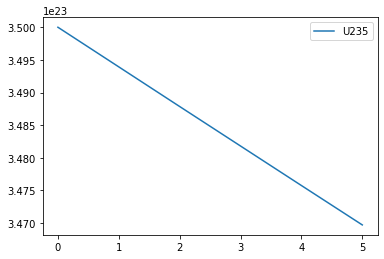

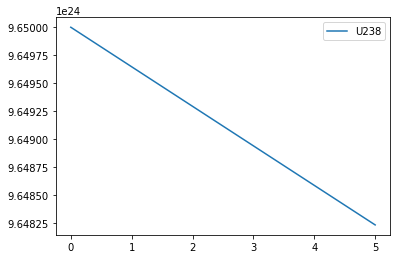

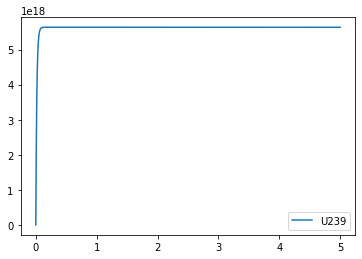

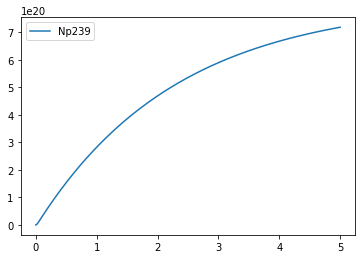

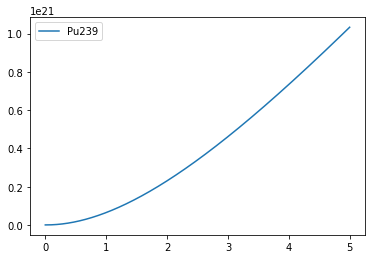

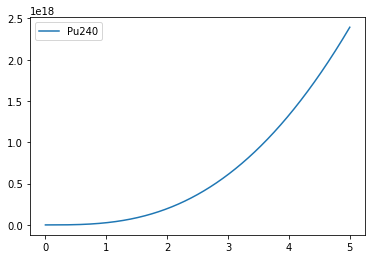

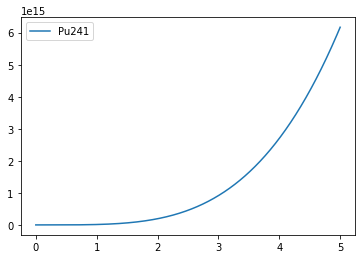

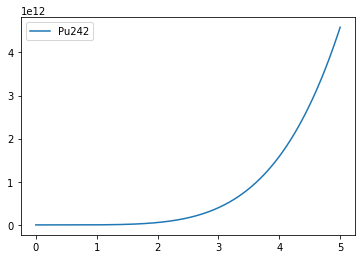

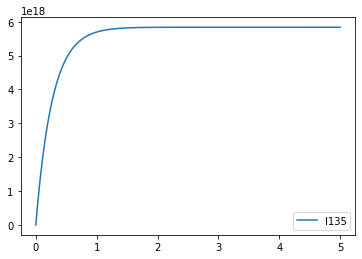

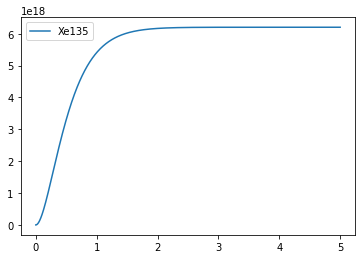

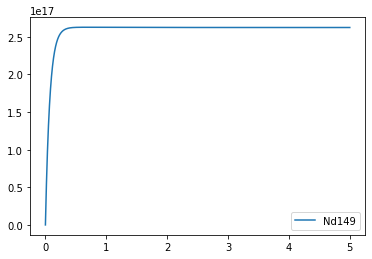

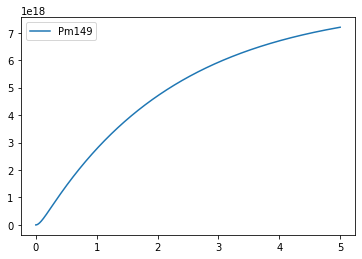

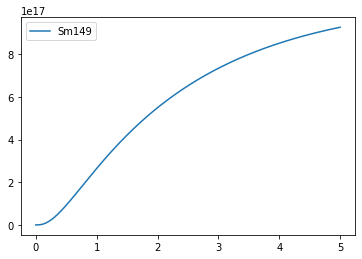

In [204]:
for i, isot in enumerate(isot_list):
    fig, ax = plt.subplots()
    ax.plot(t/(24*60*60), n[i], label=isot)
    ax.legend()
    plt.show()

2.3930985805462415e+18
2.3930985805462405e+18
2.3930985805462405e+18
2.3930985805462415e+18
2.39309858054624e+18
2.393098580546241e+18
2.39309858054624e+18
2.393098580546241e+18
2.39309858054624e+18
2.39309858054624e+18
2.393098580546242e+18
2.3930985805462395e+18
2.3930985805462405e+18
2.3930985805462426e+18
2.3930985805462405e+18
2.39309858054624e+18
2.3930985805462405e+18
2.3930985805462385e+18
2.393098580546241e+18
2.393098580546241e+18
2.393098580546242e+18
2.3930985805462405e+18
2.393098580546239e+18
2.3930985805462405e+18
2.3930985805462415e+18
2.3930985805462405e+18
2.3930985805462415e+18
2.3930985805462405e+18
2.393098580546241e+18
2.393098580546241e+18
2.393098580546238e+18
2.39309858054624e+18
2.39309858054624e+18
2.3930985805462405e+18
2.393098580546241e+18
2.3930985805462415e+18
2.3930985805462415e+18
2.393098580546241e+18
2.3930985805462405e+18
2.393098580546241e+18
2.3930985805462415e+18
2.3930985805462436e+18
2.39309858054624e+18
2.3930985805462385e+18
2.393098580546241

2.3930985805462385e+18
2.393098580546241e+18
2.393098580546245e+18
2.3930985805462395e+18
2.393098580546238e+18
2.3930985805462405e+18
2.393098580546246e+18
2.393098580546237e+18
2.393098580546244e+18
2.3930985805462426e+18
2.3930985805462436e+18
2.3930985805462364e+18
2.39309858054624e+18
2.393098580546246e+18
2.39309858054624e+18
2.3930985805462415e+18
2.3930985805462405e+18
2.393098580546241e+18
2.393098580546241e+18
2.3930985805462374e+18
2.393098580546239e+18
2.3930985805462415e+18
2.3930985805462374e+18
2.3930985805462374e+18
2.393098580546245e+18
2.393098580546246e+18
2.393098580546241e+18
2.3930985805462446e+18
2.3930985805462405e+18
2.393098580546238e+18
2.3930985805462405e+18
2.3930985805462436e+18
2.3930985805462446e+18
2.3930985805462374e+18
2.3930985805462415e+18
2.3930985805462426e+18
2.393098580546246e+18
2.3930985805462385e+18
2.393098580546241e+18
2.393098580546243e+18
2.393098580546235e+18
2.3930985805462415e+18
2.3930985805462385e+18
2.3930985805462405e+18
2.39309858

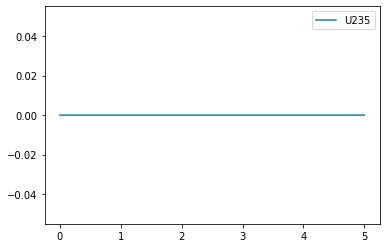

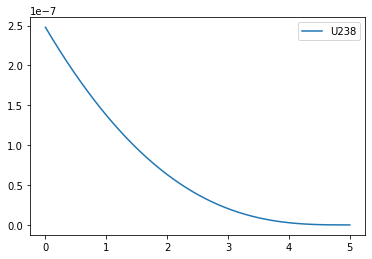

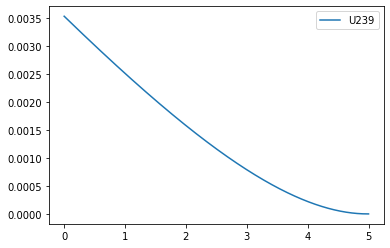

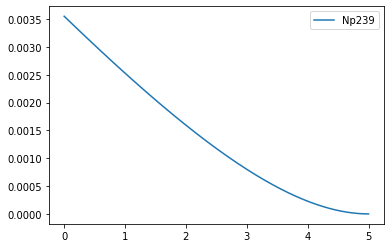

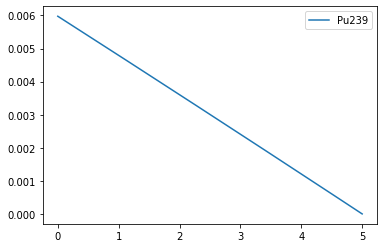

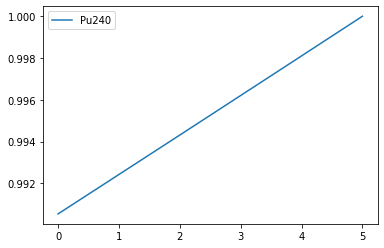

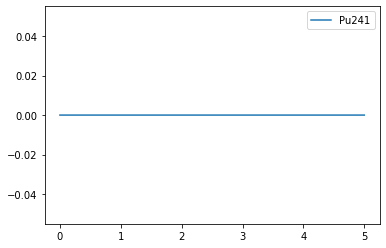

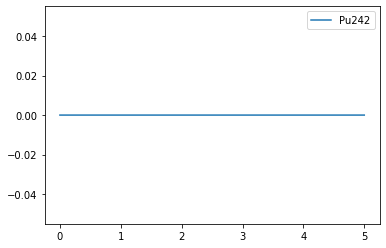

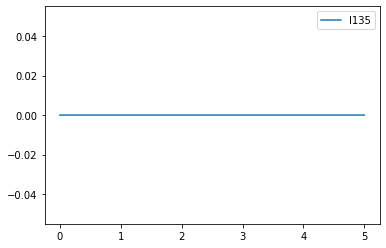

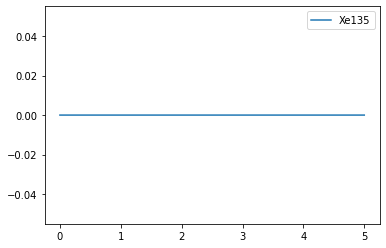

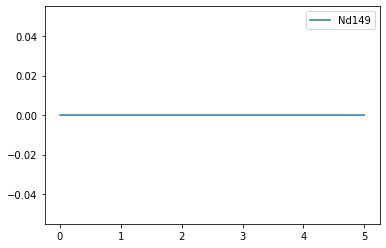

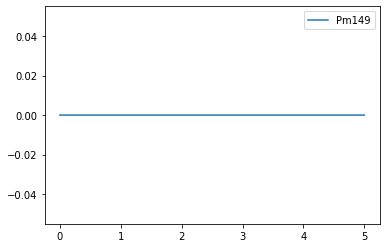

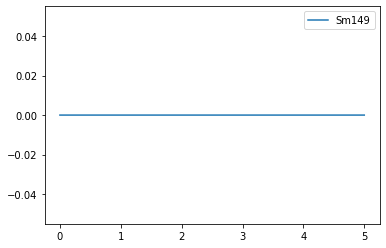

In [213]:
#test n_t calculation 
qi = np.zeros(len(isot_list))
qi[5] = 1.
nt_j = np.zeros((len(isot_list), len(t)))
for k, t_k in enumerate(t):
    nt_j[:, k] = scipy.linalg.expm(-(M.T)*(t_k-tf))@qi
    print(nt_j[:, k].dot(n[:, k]))


for i, isot in enumerate(isot_list):
    fig, ax = plt.subplots()
    ax.plot(t/(24*60*60), nt_j[i], label=isot)
    ax.legend()
    plt.show()



Calculation of the reduced basis with a range finding algorithm 

In [206]:
def randomize_parameters(xs, phi, std = 10.):
    xs = copy.deepcopy(xs)
    phi= copy.deepcopy(phi)

    for isot, xs_i in xs.items():
        if "siga" in xs_i.keys():    
            xs[isot]["siga"][0] = xs[isot]["siga"][0] * (1 + np.random.randn()*std/100.)
            xs[isot]["siga"][1] = xs[isot]["siga"][1] * (1 + np.random.randn()*std/100.)

        if "sigf" in xs_i.keys():
            xs[isot]["sigf"][0] = xs[isot]["sigf"][0] * (1 + np.random.randn()*std/100.)
            xs[isot]["sigf"][1] = xs[isot]["sigf"][1] * (1 + np.random.randn()*std/100.)
        
        if "sigc" in xs_i.keys():
            xs[isot]["sigc"][0] = xs[isot]["sigc"][0] * (1 + np.random.randn()*std/100.)
            xs[isot]["sigc"][1] = xs[isot]["sigc"][1] * (1 + np.random.randn()*std/100.)
        
        if "gamma" in xs_i.keys():
            xs[isot]["gamma"] = xs[isot]["gamma"] * (1 + np.random.randn()*std/100.)
        
        if "lambda" in xs_i.keys():
            xs[isot]["lambda"] = xs[isot]["lambda"] * (1 + np.random.randn()*std/100.)
        
        if "n0" in xs_i.keys():
            xs[isot]["n0"] = xs[isot]["n0"] * (1 + np.random.randn()*std/100.)
    
    phi[0] = phi[0] * (1 + np.random.randn()*std/100.)
    phi[1] = phi[1] * (1 + np.random.randn()*std/100.)

    return xs, phi

In [320]:
# calculate the snapshots 

s_size = 12
trials_size = 10
Snap = np.zeros((s_size, 13))
trials = []
for i in range(s_size+trials_size):
    xs_i, phi_i = randomize_parameters(xs, phi)
    n0_i = np.zeros(len(isot_list))
    for j, isot in enumerate(isot_list):
        n0_i[j] = xs_i[isot]["n0"]

    M_i = getM(xs_i, phi_i)

    nf_i =  scipy.linalg.expm(M_i*(tf-t0)).dot(n0_i)
    if i < s_size:
        Snap[i] = nf_i
    else:
        trials.append(nf_i)

#normalize the concentrations by the max for each isotopes 
# mean_coeff = []
# var_coeff = []
# for i in range(len(isot_list)):
#     mean_coeff.append(np.mean(Snap[:, i]))
#     var_coeff.append(np.std(Snap[:, i]))
#     Snap[:, i] = (Snap[:, i] - mean_coeff[-1]) / var_coeff[-1]
    # print(np.mean(Snap[:, i]), np.var(Snap[:, i]), np.std(Snap[:, i]))

U, s, Vh = scipy.linalg.svd(Snap, full_matrices=False)
if s_size < 13:
    Q = Vh
else:
    Q = U

# for i, q_i in enumerate(Q):
#     for j, q_j in enumerate(Q):
#         print(i, j, q_i.dot(q_j))

# for i in range(len(isot_list)):
#     Q[:, i] = Q[:, i] * var_coeff[i] + mean_coeff[i]


prec = []
for i in range(trials_size):
    trials[i] = trials[i] / np.linalg.norm(trials[i])  

trials_res = copy.deepcopy(trials)
trials_norm = np.zeros(trials_size)
precisions = np.zeros(s_size)
for k in range(s_size):
    for i in range(trials_size):
        trials_res[i] -= Q[k].dot(trials[i]) * Q[k]
        trials_norm[i] = np.linalg.norm(trials_res[i])  
    precisions[k] = (10 * np.sqrt(2 / np.pi)) * np.max(trials_norm)

print(precisions)
# print(Q[:2, :])

[8.42945399e-02 2.81035736e-04 8.15735645e-05 3.94097946e-06
 2.44485794e-06 1.92473650e-06 1.77513205e-06 8.46184729e-07
 2.74833559e-07 6.62912747e-08 4.17742401e-09 5.69976955e-12]


In [321]:
Snap.shape
Snap[:, 2].shape

(12,)

We try this basis of two vectors ! 

In [322]:
Q_ = Q[:12, :]
nt = []

for qi in Q_: 
    nt_i = np.zeros((len(isot_list), len(t)))
    for i, t_i in enumerate(t):
        nt_i[:, i] = scipy.linalg.expm(-M.T*(t_i-tf))@qi
    nt.append(nt_i)

In [323]:
# print(nt[j].shape)
# n.shape
# n[:, j].shape
# print(n[:, 1])
# M.T
# M_t =M.T

In [324]:
#recons rom
nb_test = 1
for i in range(nb_test):
    xs_i, phi_i = randomize_parameters(xs, phi, std=0.5)
    n0_i = np.zeros(len(isot_list))
    for j, isot in enumerate(isot_list):
        n0_i[j] = xs_i[isot]["n0"]

    M_i = getM(xs_i, phi_i)

    nf_i =  scipy.linalg.expm(M_i*(tf-t0)).dot(n0_i)
    dnf = nf_i - n[:, -1]
    # using the rom ! 
    dn0 = n0_i - n0
    dM = M_i - M
    a = []

    dnf_recons = np.zeros(len(isot_list))
    for j, qi in enumerate(Q_):
        ntdMn = np.zeros(nt[j].shape[1])
        for k in range(len(ntdMn)):
            ntdMn[k] = nt[j][:, k].dot(dM.dot(n[:, k]))

        int_ntdMn = np.trapz(ntdMn, t)
        a.append(int_ntdMn + nt[j][:, 0].dot(dn0))
        dnf_recons += a[-1] * qi

    print(dnf)
    print(dnf_recons)
    print(100*(dnf_recons-dnf)/dnf)
    


[-7.75518468e+20 -5.47163416e+22 -3.08079291e+16 -6.25082328e+18
 -3.69450874e+18 -1.10071769e+16 -8.73457427e+13 -5.77665991e+10
 -4.72281336e+16 -1.08883023e+17  1.60215651e+15  3.78969561e+16
 -2.07711065e+15]
[-7.75547587e+20 -5.47163417e+22 -3.07951232e+16 -6.26859191e+18
 -3.67680361e+18 -1.09722553e+16 -8.75111565e+13 -5.42812529e+10
 -4.72366939e+16 -1.09821745e+17  1.60583002e+15  3.80148070e+16
 -2.07704906e+15]
[ 3.75476368e-03  1.63764916e-07 -4.15667953e-02  2.84260745e-01
 -4.79228327e-01 -3.17261645e-01  1.89378211e-01 -6.03349737e+00
  1.81254451e-02  8.62138128e-01  2.29285331e-01  3.10977294e-01
 -2.96510898e-03]


In [325]:
#recons simple perturb theory 
nb_test = 1
for i in range(nb_test):
    xs_i, phi_i = randomize_parameters(xs, phi, std=0.5)
    n0_i = np.zeros(len(isot_list))
    for j, isot in enumerate(isot_list):
        n0_i[j] = xs_i[isot]["n0"]

    M_i = getM(xs_i, phi_i)

    nf_i =  scipy.linalg.expm(M_i*(tf-t0)).dot(n0_i)
    dnf = nf_i - n[:, -1]
    dnf_pc = 100*(nf_i - n[:, -1])/n[:, -1]
    # using the rom ! 
    dn0 = n0_i - n0
    dM = M_i - M
    a = []

    dnf_recons = np.zeros(len(isot_list))
    for j in range(len(isot_list)):
        qi = np.zeros(len(isot_list))
        qi[j] = 1.
        nt_j = np.zeros((len(isot_list), len(t)))
        for k, t_k in enumerate(t):
            nt_j[:, k] = scipy.linalg.expm(-M.T*(t_k-tf))@qi
            # print(nt_j[:, k].dot(n[:, k]))

        ntdMn = np.zeros(nt_j.shape[1])
        for k in range(len(ntdMn)):
            ntdMn[k] = nt_j[:, k].dot(dM.dot(n[:, k]))
            
        int_ntdMn = np.trapz(ntdMn, t)
        dnf_recons[j] = (int_ntdMn + nt_j[:, 0].dot(dn0))

    print(dnf_pc)
    print(dnf)
    print(dnf_recons)
    print(100*(dnf_recons-dnf)/dnf)

[-0.50135387  0.47178797  0.52626606  0.38021411  0.20984775 -0.95574411
 -2.242042   -3.2371808  -0.47730428 -1.20572733 -1.80338351 -1.52463274
 -1.93821324]
[-1.73955273e+21  4.55192141e+22  2.96482565e+16  2.73363464e+18
  2.16877730e+18 -2.28718987e+16 -1.38296039e+14 -1.48351937e+11
 -2.78602765e+16 -7.47743318e+16 -4.73261499e+15 -1.09734337e+17
 -1.79434481e+16]
[-1.73953548e+21  4.55191979e+22  2.96435646e+16  2.73753843e+18
  2.18083389e+18 -2.27894000e+16 -1.38856629e+14 -1.49818094e+11
 -2.78572386e+16 -7.52040038e+16 -4.76158501e+15 -1.10124645e+17
 -1.80710401e+16]
[-9.91678103e-04 -3.54739747e-05 -1.58251108e-02  1.42805881e-01
  5.55916154e-01 -3.60699027e-01  4.05354734e-01  9.88296655e-01
 -1.09041527e-02  5.74625002e-01  6.12135533e-01  3.55683950e-01
  7.11078445e-01]


Je n'arrive pas vraiment à réduire si je scale les variables avant la SVD..

Sans rescalling, on prédit seulement l'U8 et l'U5

Il faut partir sur un exemple pour un cas 1D avec une dizaine de maille, perturb le flux de la même manière ou avec une corrélation --> là, on va avoir une réduc tion de l'espace actif ! 

## Questions 


Comment faire l'intégration de la manière la plus efficace possible ? 

Méthode pour calculer n(t) pour tout t facilement ? 

Est ce qu'il ont déjà vu cette méthode dans la litérature ? 